# Домашнее задание
## Бинарная классификация и падение на Землю

### Постановка задачи
Давайте изучим способность линейного классификатора к детекции падающих на Землю космических объектов при баллистическом движении.

Падающим считается объект, траектория которого в какой-то момент времени проходит на высоте меньшей, чем граница атмосферы (100 км).

Вообще говоря, данная задача является "сильно" нелинейной и решается методом расчета элементов орбиты без привлечения машинного обучения, однако никто не мешает нам поставить задачу в форме классификации объектов с метками 0 - *не падает*, 1 - *падает*

Ранее мы уже убедились, что нелинейные задачи классификации можно решать линейными методами лишь при построении новых - нелинейных - признаков.

При выполнении данного домашнего задания Вам предстоит построить новые признаки.

Данные представляют собой набор измерений векторов состояний космических объектов

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler

Определим все необходимые функции:

In [2]:
def roc_auc_value(y_test, y_pred, showauc= True):
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_pred)
    roc_auc = round(auc(false_positive_rate, true_positive_rate),4)
    
    if showauc:
        plt.plot(false_positive_rate, true_positive_rate)
        plt.plot([0,1], [0,1])
        plt.grid()
        plt.title(f"ROC-curve. ROC AUC={roc_auc}")
        plt.show()
    return roc_auc

def print_metrics(y_pred,y_test,showauc = True):

    roc_auc = round(roc_auc_value(y_test, y_pred, showauc),5)
    accuracy = round(accuracy_score(y_true=y_test.values,y_pred = y_pred > 0.5),3)
    precision = round(precision_score(y_true=y_test.values,y_pred = y_pred > 0.5),3)
    recall = round(recall_score(y_true=y_test.values,y_pred = y_pred > 0.5),3)
    f1_score = round(2*recall*precision / (precision+recall),3)
    
    print(f'Остальные метрики:')
    print(' '*5+f'accuracy: {accuracy}')
    print(' '*5+f'precision: {precision}')
    print(' '*5+f'recall: {recall}')
    print(' '*5+f'f1-score: {f1_score}')
    
    return roc_auc

Загрузим данные:

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,X,Y,Z,dX,dY,dZ,threat
0,-1784.074714,7530.654089,-7923.682494,7.960295,-8.734479,-2.338451,False
1,-4251.346313,3364.199632,5656.417484,3.672929,6.002698,-5.306253,True
2,8391.790633,-7548.946980,3564.884692,-8.131620,-7.709265,5.283694,False
3,-6018.748916,6334.845367,-1301.345691,9.797672,9.634480,-11.788118,False
4,6897.440983,6919.731273,8319.744778,2.277441,-4.172691,-4.843300,False


Обучающая и тестовая выборки:

In [5]:
X_train, y_train = train[['X','Y','Z','dX','dY','dZ']], train["threat"]
X_test, y_test = test[['X','Y','Z','dX','dY','dZ']], test["threat"]

### Задание 1
Обучите логистическую регрессию на:
1. чистых данных;
2. нормализованных данных.

Используйте LogisticRegression с настройками по умолчанию, либо как в следующей ячейке

#### Чистые данные


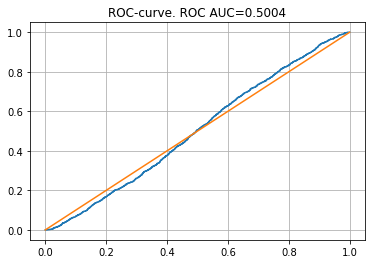

Остальные метрики:
     accuracy: 0.517
     precision: 0.523
     recall: 0.637
     f1-score: 0.574


In [6]:
# Модель на чистых данных
def preprocessing(X):
    return
model_0 = LogisticRegression(solver="newton-cg")

# Вызовите метод обучения 
model_0.fit(X_train, y_train)

y_pred_LR = model_0.predict_proba(X_test)[:,1]
roc_auc_0 = print_metrics(y_pred_LR,y_test)

In [7]:
# Скрытые тесты, которые будут выполнены после отправки решения.

Посмотрите на величину ROC AUC. Какие выводы можно сделать?

#### Нормализованные данные

Здесь необходимо привести данные к нормализованному виду. 
Для нормализации данных используйте класс StandardScaler. По умолчанию StandardScaler приводит признаки к нулевому среднему и единичной дисперсии

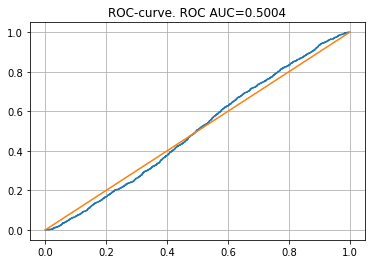

Остальные метрики:
     accuracy: 0.517
     precision: 0.523
     recall: 0.637
     f1-score: 0.574


In [8]:
def Scaler(X_train,X_test):
    stdS = StandardScaler()
    # Помните: на обучающей выборке мы сначала рассчитываем параметры нормализации, затем уже применяем их к выборке.
    # На тестовой выборке мы сразу применяем полученные ранее параметры нормализации
    X_train_n = stdS.fit_transform(X_train)
    X_test_n = stdS.transform(X_test)
    return X_train_n,X_test_n

X_train_n,X_test_n = Scaler(X_train,X_test)

model_1 = LogisticRegression(C = 30.3,solver="newton-cg")

#Вызовите метод обучения 
model_1.fit(X_train_n, y_train)

y_pred_LR = model_1.predict_proba(X_test_n)[:,1]
roc_auc_1 = print_metrics(y_pred_LR,y_test)

In [9]:
# Скрытые тесты, которые будут выполнены после отправки решения.

Изменилось ли значение ROC-AUC?

### Задание 2. Новые признаки

Как мы только что убедились, использование признаков такими, какими они есть, приводит к удручающему результату. 
Однако лекциях было показано, что в подобных случаях часто помогает генерация новых, например, полиномиальных признаков. Давайте попробуем сгенерировать квадратичные и кубические признаки 

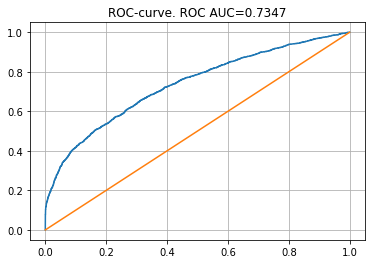

Остальные метрики:
     accuracy: 0.667
     precision: 0.668
     recall: 0.693
     f1-score: 0.68


In [10]:
def preprocessing(df_X):
    X = df_X.copy()
    X = pd.concat([X, X**2, X**3], axis=1)
    return X

X_train_pre = preprocessing(X_train)
X_test_pre = preprocessing(X_test)

X_train_n,X_test_n = Scaler(X_train_pre,X_test_pre)

model_2 = LogisticRegression(C = 3.3,solver='lbfgs')

#Вызовите метод обучения 
model_2.fit(X_train_n, y_train)

y_pred_LR = model_2.predict_proba(X_test_n)[:,1]
roc_auc_2 = print_metrics(y_pred_LR,y_test)

In [11]:
# Скрытые тесты, которые будут выполнены после отправки решения.

Обратите внимание на значение метрик.

### Задание 3. Еще больше признаков

Давайте попробуем добиться значения величины ROC AUC 0,8 и даже чуть больше.
Для этого нам потребуется чуть больше разнообразных признаков.

Остается вопрос, как именно генерировать признаки. Здесь может быть много разных рекомендаций, мы пойдем двумя путями:
1. Понимание физической природы данных;
2. Усиление взаимодействия между признаками.

Эти два пути вполне могут привести к приблизительно одинаковым новым признакам.

Понимание **физической** природы данных, вообще говоря, обеспечивает качество решения задачи классификации.

В нашем случае эти данные - вектор координат и скоростей космического объекта, а метка - упал/не упал на Землю. Подкованный в баллистике человек сразу заметит, что такие признаки сами по себе не могут помочь в решении задачи классификации, а вот различные комбинации скоростей и координат уже могут нам помочь, так как именно комбинации по средством умножения скоростей и координат участвуют в вычислении различных параметров орбиты.

Второй избранный нами путь - это **усиление** взамосвязей между признаками. Оно может быть оправдано следующими соображениями. После добавления полиномиальных признаков мы могли наблюдать существенное увеличение качества классификации. При это новые признаки генерировались независимо друг друга. А что произойдет, если новые признаки будут "завязаны" на нескольких исходных? Часто этим можно добиться довольно существенных результатов. Связь между признаками также предлагается взять как произведение.

Задание состоит в генерации новых признаков таким образом, чтобы значительно улучшить предыдущее значение ROC AUC. Можно как угодно смешивать признаки, перемножать друг на друга, брать модули произведений, суммы квадратов и т.п.

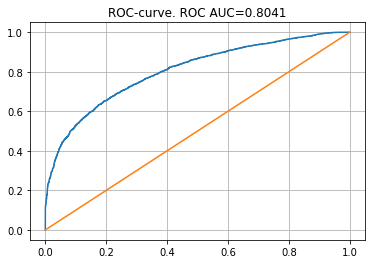

Остальные метрики:
     accuracy: 0.722
     precision: 0.727
     recall: 0.733
     f1-score: 0.73


In [12]:
def preprocessing(df_X):
    
    X = df_X.copy()
    ### Ваша генерация признаков
    X = pd.concat([
                   abs(X["X"]*X["dX"]), abs(X["Y"]*X["dY"]), abs(X["Z"]*X["dZ"]), 
                   abs(X["X"]*X["dY"]), abs(X["X"]*X["dZ"]), abs(X["Y"]*X["dX"]), 
                   abs(X["Y"]*X["dZ"]), abs(X["Z"]*X["dX"]), abs(X["Z"]*X["dY"]), 
                   abs(X["X"]*X["Y"]*X["Z"]),
                   abs(X["dX"]*X["dY"]*X["dZ"]),
                   X["X"]**2 + X["Y"]**2 + X["Z"]**2,
                   abs(X["X"]**3) + abs(X["Y"]**3) + abs(X["Z"]**3),
                  ], axis=1)
    return X

X_train_pre = preprocessing(X_train).copy()
X_test_pre = preprocessing(X_test).copy()

X_train_n,X_test_n = Scaler(X_train_pre,X_test_pre)

model_3 = LogisticRegression(C = 0.5,solver='lbfgs')

#Вызовите метод обучения 
model_3.fit(X_train_n, y_train)

y_pred_LR = model_3.predict_proba(X_test_n)[:,1]
roc_auc_3 = print_metrics(y_pred_LR,y_test)

In [13]:
# Скрытые тесты, которые будут выполнены после отправки решения.

### Бонус

Выполните следующие ячейки и посмотрите на ROC AUC и другие метрики. Обратите внимание, что обучение модели, которая называется lgbm, происходит на "сырых" данных. Это так называемый градиентный бустинг, и он значительно лучше логистической регрессии решает многие задачи классифкации. С моделями такого типа мы познакомимся в следующих частях нашего курса.

In [14]:
import lightgbm as lgb

In [15]:
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_test, y_test, reference=dtrain)

[LightGBM] [Info] Number of positive: 13616, number of negative: 13426
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 27042, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503513 -> initscore=0.014052
[LightGBM] [Info] Start training from score 0.014052
[100]	training's auc: 0.948637	valid_1's auc: 0.923593
[200]	training's auc: 0.982664	valid_1's auc: 0.961097
[300]	training's auc: 0.991776	valid_1's auc: 0.972712
[400]	training's auc: 0.995207	valid_1's auc: 0.977922
[500]	training's auc: 0.996994	valid_1's auc: 0.980829
[600]	training's auc: 0.998062	valid_1's auc: 0.982722
[700]	training's auc: 0.998683	valid_1's auc: 0.983908
[800]	training's auc: 0.999119	valid_1's auc: 0.984788
[9

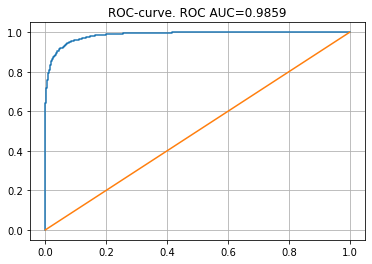

Остальные метрики:
     accuracy: 0.934
     precision: 0.942
     recall: 0.928
     f1-score: 0.935


In [16]:
params = {'objective': 'binary',
          'num_leaves': 50,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.9,
          'learning_rate':0.1,          
          'lambda_l2': 100,
          'metric':'auc',          
          }
    
    # обучение модели
num_trees = 1000
lgbm = lgb.train(params.copy(),dtrain,num_boost_round = num_trees,valid_sets=[dtrain,dvalid],
                      #evals_result=evals_result
                      #,early_stopping_rounds=20
                      verbose_eval = 100)

print('Обучился!')

y_pred_bst = lgbm.predict(X_test)
roc_lgbm = print_metrics(y_pred_bst,y_test)